## Formal Simulated Inference

### Step 1: Define formal test


We sample graphs from \mathscr{F}<sub>G,Y</sub> = { F<sub>G,Y</sub>(\cdot; \theta) : \theta \in \Theta }. Since, all samples observed are graph matched (i.e. nodes are equal across graphs), we can look at just the distribution of adjacency matrices: F<sub>G,Y</sub> = F<sub>A,Y</sub>

Assuming all edges are ~iid Bernoulli, F<sub>A,Y</sub> = \prod<sub>u,v \in \mathscr{E}</sub> F<sub>A<sub>uv</sub>,Y</sub>, where \mathscr{E} \subset V x V is the set of edges in the graph.

If there is an inter-class difference between the populations, F<sub>A,1</sub> \noteq F<sub>A,0</sub>.

We observe a feature of the graphs, \bar{x<sub>i</sub>}, which indicates the sum of edges in the graphs, which will be used to classify the graphs. If the mentioned interclass difference exists, then \bar{x<sub>1</sub>} \noteq \bar{x<sub>0</sub>}.

The null hypothesis, that subjects are from the same distribution regardless from class, and the alternate, that a class difference exist, can be then written as follows:

H<sub>0</sub>: F<sub>A,1</sub> = F<sub>A,0</sub> <br/>
H<sub>A</sub>: F<sub>A,1</sub> \noteq F<sub>A,0</sub> <br/>

###  Step 2:  Sample data from null

In [1]:
import numpy as np
# for reproducibility, set random seed
np.random.seed(123456789)

# define number of rois
n=70

# define number of subjects per class
S=150
s0 = S/2
s1 = S-s0

# sample graph distribution: G_i ~ ER(p_i)
g0 = 1 * (np.random.rand( n, n, s0) > 0.50) # (null), 0.52 (classes)
g1 = 1 * (np.random.rand( n, n, s1) > 0.50) # (null), 0.48 (classes)

# compute feature of data
mbar0 = np.sum(g0, axis=(0,1))
mbar1 = np.sum(g1, axis=(0,1))


### Step 3: Test hypothesis

In [2]:
from scipy import stats

# compute t-test on feature
p = stats.ttest_ind(mbar0, mbar1)[1]

result = p < 0.05
print "p-value: " + str(p)
print "Based on this we can reject the null model with 95% certainty: " + str(result)

p-value: 0.0754598321872
Based on this we can reject the null model with 95% certainty: False


### Step 4: Repeat analysis over varying sample sizes and plot

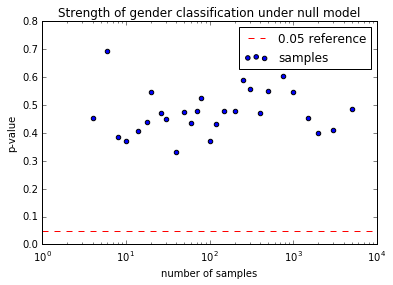

In [3]:
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

S = np.array((4, 6, 8, 10, 14, 18, 20, 26, 30, 40,
              50, 60, 70, 80, 100, 120, 150, 200, 250,
              300, 400, 500, 750, 1000, 1500, 2000,
              3000, 5000))

pvals = np.array((), dtype=np.dtype('float64'))
# compute this statistic for various sizes of datasets
for s in S:
    s0 = s/2
    s1 = s - s0

    # compute this many times for each operating point to get average
    p = np.array((), dtype=np.dtype('float64'))    
    for _ in itertools.repeat(None,15):
        g0 = 1 * (np.random.rand( n, n, s0) > 0.5) # (null), 0.52 (classes)
        g1 = 1 * (np.random.rand( n, n, s1) > 0.5) # (null), 0.48 (classes)

        # compute feature of data
        mbar0 = np.sum(g0, axis=(0,1))
        mbar1 = np.sum(g1, axis=(0,1))

        # compute t-test on feature
        p = np.append(p, stats.ttest_ind(mbar0, mbar1)[1])
    
    # record average p value at operating point
    pvals = np.append(pvals, np.mean(p))

# plot
plt.scatter(S, pvals, hold=True, label='samples')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('p-value')
plt.title('Strength of gender classification under null model')
plt.axhline(0.05, color='red', linestyle='--', label='0.05 reference')
plt.legend()
plt.show()
